# <center> Universidad Pólitecnica Salesiana </center>

## PLANTAMIENTO DE PROBLEMA
- La persona llega 20 minutos antes de la hora de vacunacion
- Ingresa a la cola/fila a que toque su turno
- Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
- Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
- Finalmente llevados a la salida entre (1-3 minutos).

Finalmente generar las siguientes metricas/graficas:
- Tiempo de espera promedio para cada persona.
- Tiempo promedio total que requiere un paciente para ser vacunado.
- Cuantos pacientes se atendieron.
- Cuantos pacientes se quedaron sin atender.

In [39]:
import simpy
import random
import matplotlib.pyplot as pp


In [40]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VACUNAS = 57
# Total de numero de mesas para vacunacion
NUM_MESAS = 3
PACIENTES = 300
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 480 #Minutos = 8 horas
INTERVALO = 10

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionario para el numero de pacientes que han sido atendidos
p_vacunado =[]
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

class Punto(object):
    
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    #Proceso de control, para toma de signos vitales y valida estar dentro del padron
    def control_paciente(self, paciente):
        t_con = random.randint(2,5)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunar_paciente(self, paciente):
        t_vacunacion = random.randint(5,10)
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    #Traslado para la salida del paciente
    def salida_paciente(self,paciente):
        t_salida = random.randint(1,3)
        yield self.env.timeout(t_salida)
        
        
       
    
def llegada_paciente(env, nombre,punto):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del paciente
        yield env.process(punto.control_paciente(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            p_no_vacunado.append(nombre)
            
        else:
            # Indicamos que paciente ingresa a la mesa de vacunacion
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            
            # Se realiza la vacunacion
            yield env.process(punto.vacunar_paciente(nombre))
            # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            p_vacunado.append(nombre)
            
        yield env.process(punto.salida_paciente(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))
        
        
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    punto = Punto(env,num_mesas,"Cuenca")
    for i in range(pacientes):
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    
print("Punto de vacunacion Cuenc")

# Creamos el entorno de simulacion
env=simpy.Environment()
print("pacientes ", PACIENTES)
env.process(ejecutar_simulacion(env, NUM_MESAS,PACIENTES,INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)



Punto de vacunacion Cuenc
pacientes  300
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Paciente-

[(1, 9), (2, 8), (3, 9), (4, 7), (5, 8), (6, 6), (7, 7), (8, 10), (11, 9), (12, 9), (15, 6), (16, 10), (17, 8), (24, 6), (26, 7), (29, 10), (32, 5), (33, 5), (35, 7), (38, 10), (40, 5), (43, 6), (46, 9), (49, 9), (50, 7), (51, 5), (52, 10), (54, 8), (55, 10), (58, 6), (59, 5), (65, 10), (66, 9), (67, 9), (68, 8), (69, 7), (70, 10), (71, 10), (74, 9), (75, 7), (76, 6), (78, 9), (79, 10), (82, 6), (83, 10), (86, 9), (92, 5), (93, 5), (101, 9), (102, 8), (103, 8), (104, 5), (105, 5), (106, 6), (108, 8), (109, 10), (111, 6), (116, 8), (117, 6), (119, 8), (121, 8), (122, 6), (126, 8), (128, 5), (129, 9), (130, 8), (133, 9), (140, 8), (142, 10), (143, 10), (146, 10), (148, 7), (149, 9), (150, 9), (151, 7)]


Text(0.5, 0, 'Tiempo tomado')

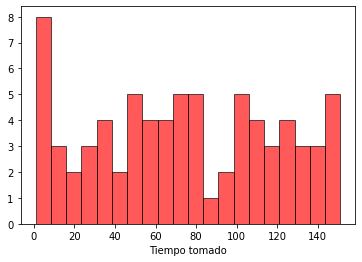

In [41]:
# Generamos la grafica
datos=sorted(tiempo_vacunacion.items())
print(datos)
x, y =zip(*datos)
result = pp.hist(x,bins=20,color='red',edgecolor='k',alpha=0.65)
pp.xlabel("Pacientes")
pp.xlabel("Tiempo tomado")


In [42]:
suma = 0
for val in tuple(tiempo_vacunacion.values()):
    suma = suma+val
print("Promedio de tiempo vacunacion",suma/len(tiempo_vacunacion))

Promedio de tiempo vacunacion 7.8


In [43]:
print("Total de pacientes que llegaron ",PACIENTES)
print("Vacunados ", len(p_vacunado))
print("No vacunados ", len(p_no_vacunado))
n_atendidos = PACIENTES-(len(p_vacunado)+len(p_no_vacunado))
print("Pacientes no atendidos",n_atendidos)

Total de pacientes que llegaron  300
Vacunados  75
No vacunados  77
Pacientes no atendidos 148
